In [20]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [21]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025C82BD1A58>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025C82E91710>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000025C82E91780>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape, mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [9]:
import numpy as np
from matplotlib import pyplot as plt

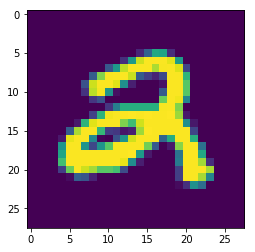

In [10]:
first_image = mnist.train.images[247]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))

plt.imshow(first_image)
plt.show()

In [11]:
with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[ 0.06878314 -1.1821705   1.0287824  ... -0.2522529   0.3765595
  -0.05893121]
 [ 0.19949174 -0.18373983  0.16459483 ... -0.5468374  -0.9643032
  -0.5958155 ]
 [-0.61271256  1.2013489  -0.10747299 ... -0.25270677  0.76386243
  -0.0989073 ]
 ...
 [ 0.56780547  0.32911527  0.3689519  ... -0.31746963  0.6601683
  -0.35363373]
 [ 0.83126265 -0.29884157  1.8826206  ...  0.8158519  -0.5194916
  -0.70154196]
 [-0.9358681   0.09124441  1.1752931  ... -0.42438835 -0.6047488
  -0.3644611 ]]


In [12]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes])),
}
    
biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes])),
}

In [13]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [14]:
def forward_propogation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [15]:
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propogation(x,weights,biases)

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [17]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [28]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [29]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict={x:batch_x, y:batch_y})
        total_cost+=c
    print(total_cost)

25595.988951563835
4451.2246454831475
2465.156368834432
1852.817976086871
1401.4191951778714
1203.0438806209577
959.6015889388292
966.5616225326222
1011.808176979696
754.2878598858525
660.3626665842916
552.7965730684673
565.088302281251
481.87011461661643
454.5246947481178
412.1904129139609
324.83017561935037
328.0760751945262
268.34401136652673
276.66655650939464
199.3837428398567
257.43486664908016
186.94873752907654
181.01952697019806
168.317816138279


In [27]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,correct_labels)

predictions,correct_predictions = sess.run([predictions,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_predictions.sum()

8705